In [5]:
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import pytesseract
import imutils
import cv2
import re
import requests
import numpy as np

In [6]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()

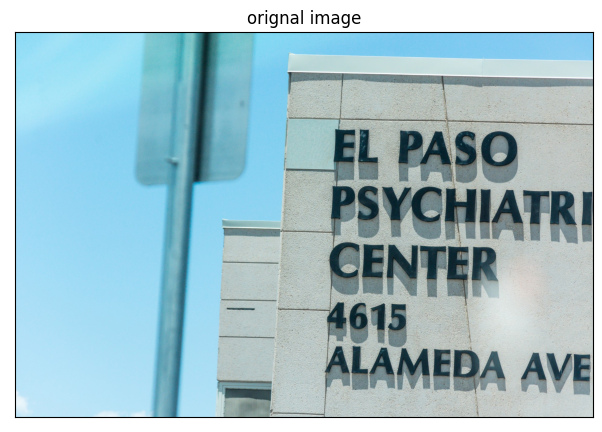

In [7]:
url = 'https://user-images.githubusercontent.com/69428232/148330274-237d9b23-4a79-4416-8ef1-bb7b2b52edc4.jpg'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image_2 = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
org_image=cv2.imread('C:\\Users\\ICE\\Desktop\\df\\Data\\test\\0A173D2A81571B8E365DC056BC6E45D6.jpg')
plt_imshow("orignal image", org_image)

In [11]:
pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'
options = "--psm 4"
text = pytesseract.image_to_string(cv2.cvtColor(org_image, cv2.COLOR_BGR2RGB), config=options)
 
# OCR결과 출력
print("[INFO] OCR결과:")
print("==================")
print(text)
print("\n")

[INFO] OCR결과:





In [19]:
from PIL import Image
import pytesseract 

pytesseract.pytesseract.tesseract_cmd = r'C:\Program Files\Tesseract-OCR\tesseract.exe'

img = Image.open('C:\\Users\\ICE\\Desktop\\df\\Data\\test\\1.png')
text = pytesseract.image_to_string(img,lang='eng')

print (text)

In [20]:
from imutils.object_detection import non_max_suppression
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import matplotlib.pyplot as plt
import imutils
import numpy as np
import requests
import pytesseract
import cv2

In [21]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
def decode_predictions(scores, geometry):
	(numRows, numCols) = scores.shape[2:4]
	rects = []
	confidences = []
 
	for y in range(0, numRows):
		scoresData = scores[0, 0, y]
		xData0 = geometry[0, 0, y]
		xData1 = geometry[0, 1, y]
		xData2 = geometry[0, 2, y]
		xData3 = geometry[0, 3, y]
		anglesData = geometry[0, 4, y]
 
		for x in range(0, numCols):
			if scoresData[x] < min_confidence:
				continue
 
			(offsetX, offsetY) = (x * 4.0, y * 4.0)
 
			angle = anglesData[x]
			cos = np.cos(angle)
			sin = np.sin(angle)
 
			h = xData0[x] + xData2[x]
			w = xData1[x] + xData3[x]
 
			endX = int(offsetX + (cos * xData1[x]) + (sin * xData2[x]))
			endY = int(offsetY - (sin * xData1[x]) + (cos * xData2[x]))
			startX = int(endX - w)
			startY = int(endY - h)
 
			rects.append((startX, startY, endX, endY))
			confidences.append(scoresData[x])
 
	return (rects, confidences)

In [23]:
layerNames = ["feature_fusion/Conv_7/Sigmoid",
              "feature_fusion/concat_3"]
 
# 사전에 훈련된 EAST text detector 모델 Load
print("[INFO] loading EAST text detector...")
net = cv2.dnn.readNet("C:\\Users\\ICE\\Desktop\\df\\frozen_east_text_detection.pb")

[INFO] loading EAST text detector...


In [24]:
width = 640
height = 640
min_confidence = 0.5
padding = 0.0

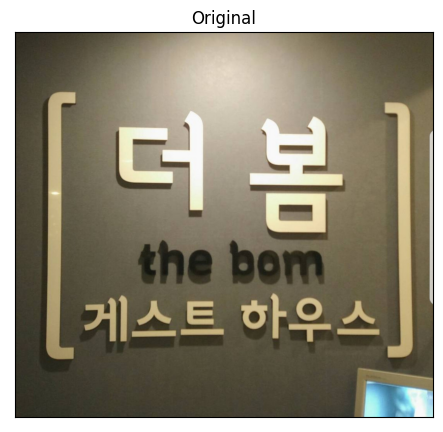

In [35]:
url = 'https://user-images.githubusercontent.com/69428232/149087561-4803b3e0-bcb4-4f9f-a597-c362db24ff9c.jpg'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image_2 = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
org_image=cv2.imread('C:\\Users\\ICE\\Desktop\\df\\Data\\test\\00A4AB754EC160537692825C124CF1C4.jpg')
plt_imshow("Original", org_image)

In [36]:
orig = org_image.copy()
(origH, origW) = org_image.shape[:2]
 
(newW, newH) = (width, height)
rW = origW / float(newW)
rH = origH / float(newH)
 
org_image = cv2.resize(org_image, (newW, newH))
(H, W) = org_image.shape[:2]

In [37]:
blob = cv2.dnn.blobFromImage(org_image, 1.0, (W, H), (123.68, 116.78, 103.94), swapRB=True, crop=False)
net.setInput(blob)
(scores, geometry) = net.forward(layerNames)
 
(rects, confidences) = decode_predictions(scores, geometry)
boxes = non_max_suppression(np.array(rects), probs=confidences)

In [41]:
results = []
 
for (startX, startY, endX, endY) in boxes:
	startX = int(startX * rW)
	startY = int(startY * rH)
	endX = int(endX * rW)
	endY = int(endY * rH)
 
	dX = int((endX - startX) * padding)
	dY = int((endY - startY) * padding)
 
	startX = max(0, startX - dX)
	startY = max(0, startY - dY)
	endX = min(origW, endX + (dX * 2))
	endY = min(origH, endY + (dY * 2))
	# 영역 추출
	roi = orig[startY:endY, startX:endX]
 
	config = ("-l eng --psm 4")
	text = pytesseract.image_to_string(roi, config=config)
	print(text)
	results.append(((startX, startY, endX, endY), text))

1140 397
564 944
984 947
960 1206
315 1220


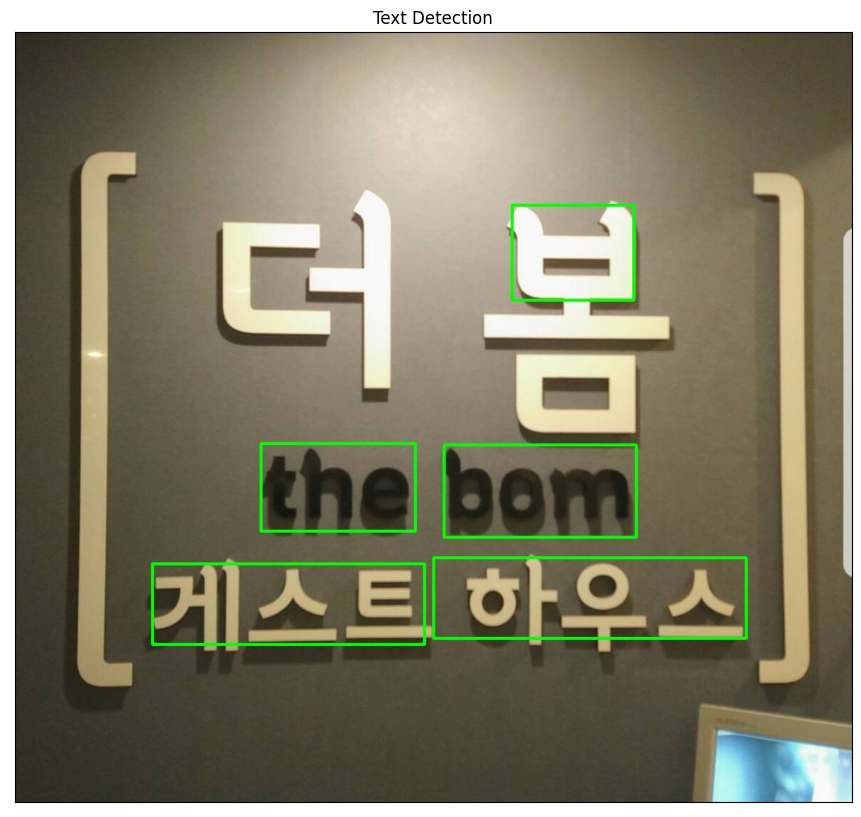

In [43]:
results = sorted(results, key=lambda r:r[0][1])
 
output = orig.copy()
 
# 결과 출력
for ((startX, startY, endX, endY), text) in results:
	cv2.rectangle(output, (startX, startY), (endX, endY), (0, 255, 0), 5)
	cv2.putText(output, text, (startX, startY - 20), cv2.FONT_HERSHEY_SIMPLEX, 1.2, (0, 255, 0), 5)
	print(startX,startY)
 
plt_imshow("Text Detection", output, figsize=(16, 10))

In [44]:
import easyocr 
import numpy as np
from PIL import ImageFont, ImageDraw, Image
import cv2 
import random 
import matplotlib.pyplot as plt


c:\Users\ICE\AppData\Local\Programs\Python\Python37\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Using CPU. Note: This module is much faster with a GPU.


Progress: |██████████████████████████████████████████████████| 100.0% Complete

Progress: |██████████████████████████████████████████████████| 100.1% Complete

FileNotFoundError: No such file: 'C:\Users\82102\Desktop\data7.jpg'

In [45]:
reader = easyocr.Reader(['ko', 'en'], gpu=False)
result = reader.readtext("C:\\Users\\ICE\\Desktop\\df\\Data\\test\\00A4AB754EC160537692825C124CF1C4.jpg")
img    = cv2.imread("C:\\Users\\ICE\\Desktop\\df\\Data\\test\\00A4AB754EC160537692825C124CF1C4.jpg")
img = Image.fromarray(img)
font = ImageFont.truetype("fonts/HMKMRHD.TTF",40)
draw = ImageDraw.Draw(img)
np.random.seed(42)
COLORS = np.random.randint(0, 255, size=(255, 3),dtype="uint8")
for i in result :
    x = i[0][0][0] 
    y = i[0][0][1] 
    w = i[0][1][0] - i[0][0][0] 
    h = i[0][2][1] - i[0][1][1]

    color_idx = random.randint(0,255) 
    color = [int(c) for c in COLORS[color_idx]]
    draw.rectangle(((x, y), (x+w, y+h)), outline=tuple(color), width=2)
    draw.text((int((x + x + w) / 2) , y-2),str(i[1]), font=font, fill=tuple(color),)
plt.imshow(img)
plt.show()

Using CPU. Note: This module is much faster with a GPU.


OSError: cannot open resource

In [2]:
from matplotlib import pyplot as plt
# from imutils.perspective import four_point_transform
# from imutils.contours import sort_contours
# import imutils
# from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [3]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
 
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
  image_list_title = []
  image_list = []
 
  image = imutils.resize(image, width=width)
  ratio = org_image.shape[1] / float(image.shape[1])
 
  # 이미지를 grayscale로 변환하고 blur를 적용
  # 모서리를 찾기위한 이미지 연산
  gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
  blurred = cv2.GaussianBlur(gray, ksize, 0)
  edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
  image_list_title = ['gray', 'blurred', 'edged']
  image_list = [gray, blurred, edged]
 
  # contours를 찾아 크기순으로 정렬
  cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
  cnts = imutils.grab_contours(cnts)
  cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
  findCnt = None
 
  # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
  for c in cnts:
    peri = cv2.arcLength(c, True)
    approx = cv2.approxPolyDP(c, 0.02 * peri, True)
 
    # contours가 크기순으로 정렬되어 있기때문에 제일 첫번째 사각형을 영역으로 판단하고 break
    if len(approx) == 4:
      findCnt = approx
      break
 
 
  # 만약 추출한 윤곽이 없을 경우 오류
  if findCnt is None:
    raise Exception(("Could not find outline."))
 
 
  output = image.copy()
  cv2.drawContours(output, [findCnt], -1, (0, 255, 0), 2)
  
  image_list_title.append("Outline")
  image_list.append(output)
 
  # 원본 이미지에 찾은 윤곽을 기준으로 이미지를 보정
  transform_image = four_point_transform(org_image, findCnt.reshape(4, 2) * ratio)
 
  plt_imshow(image_list_title, image_list)
  plt_imshow("Transform", transform_image)
 
  return transform_image

In [4]:
def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
  # Colab이 아닌 Local에서 수행 시에는 gulim.ttc 를 사용하면 됩니다.
  # font = ImageFont.truetype("fonts/gulim.ttc", font_size)
  font = ImageFont.truetype('/usr/share/fonts/truetype/nanum/NanumGothicBold.ttf', font_size)
  img = Image.fromarray(cv_img)
   
  draw = ImageDraw.Draw(img)
  draw.text((x, y), text, font=font, fill=color)
 
  cv_img = np.array(img)
  
  return cv_img

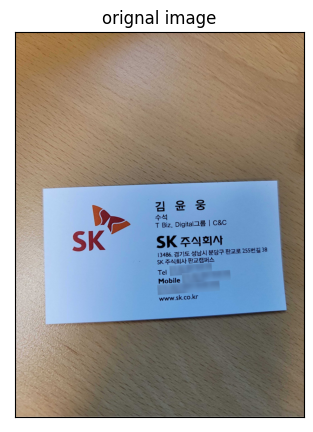

[[[255 255 249]
  [255 254 244]
  [255 255 242]
  ...
  [255 255 254]
  [255 255 254]
  [255 255 254]]

 [[251 255 250]
  [255 255 249]
  [255 255 247]
  ...
  [250 253 255]
  [250 253 255]
  [250 253 255]]

 [[250 255 255]
  [251 255 254]
  [255 255 251]
  ...
  [239 252 255]
  [239 252 255]
  [239 252 255]]

 ...

 [[243 254 255]
  [242 252 255]
  [248 252 255]
  ...
  [ 94 110 122]
  [ 94 110 122]
  [ 86 102 114]]

 [[243 253 255]
  [246 255 255]
  [251 254 255]
  ...
  [100 111 119]
  [ 96 107 115]
  [ 95 106 114]]

 [[253 255 255]
  [253 251 250]
  [255 252 247]
  ...
  [237 240 248]
  [236 239 247]
  [237 240 248]]]


In [6]:
url = 'https://user-images.githubusercontent.com/69428232/155486780-55525c3c-8f5f-4313-8590-dd69d4ce4111.jpg'
 
image_nparray = np.asarray(bytearray(requests.get(url).content), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR)
org_image_2=cv2.imread('C:\\Users\\IT\\Desktop\\test\\kantata.jpg')

#business_card_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)


In [5]:
langs = ['ko', 'en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(org_image)
px=[-2,2,2,-2]
py=[-2,-2,2,2]

[INFO] OCR'ing input image...


In [6]:
px=[-1,1,1,-1]
py=[-1,-1,1,1]
for i in range(len(results[0][0])):

    for k in range(4):
        results[i][0][k][0]+=px[k]
        results[i][0][k][1]+=py[k]

print(results)


[([[220, 48], [280, 48], [280, 64], [220, 64]], "7''4", 0.04994713142514229), ([[262, 86], [320, 86], [320, 102], [262, 102]], 'OPE: ', 0.1416203817146327), ([[184, 208], [380, 208], [380, 274], [184, 274]], '가타다', 0.3953071578620278), ([[260, 260], [348, 260], [348, 278], [260, 278]], '오리지닐 원두거피', 0.5791244462800589), ([[230, 358], [368, 358], [368, 390], [230, 390]], '프리미엄 라떼', 0.4787160384703855), ([[229, 391], [367, 391], [367, 411], [229, 411]], '10036이리비카원두 불건드', 0.19278902649773808), ([[281, 423], [361, 423], [361, 439], [281, 439]], 'DOUBLE DRIP', 0.8550659845028327), ([[278, 432], [362, 432], [362, 458], [278, 458]], '정중어품침놈', 1.853832892720858e-05), ([[183, 457], [370, 457], [370, 484], [183, 484]], '23m23*CaID3-인하유 {4mg 악6&', 0.0015571659284005254)]


In [7]:
simple_results = reader.readtext(org_image, detail = 0)
simple_results

["7''4",
 'OPE: ',
 '가타다',
 '오리지닐 원두거피',
 '프리미엄 라떼',
 '10036이리비카원두 불건드',
 'DOUBLE DRIP',
 '정중어품침놈',
 '23m23*CaID3-인하유 {4mg 악6&']

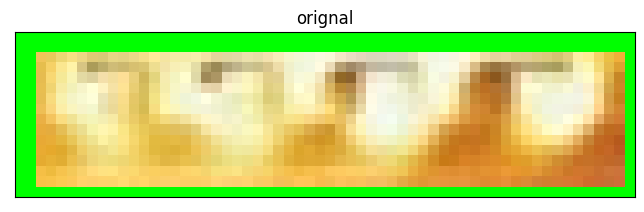

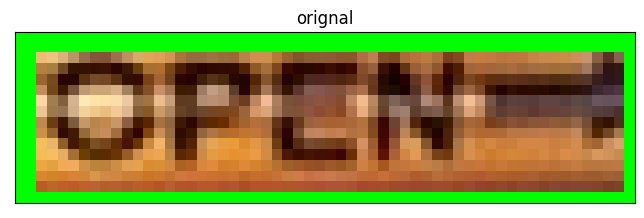

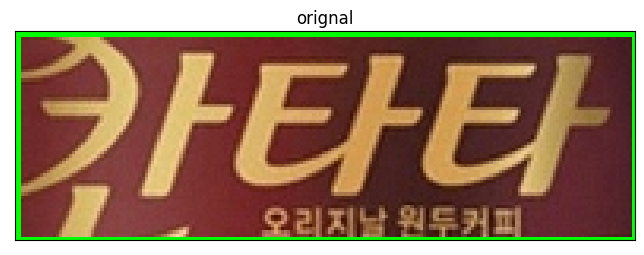

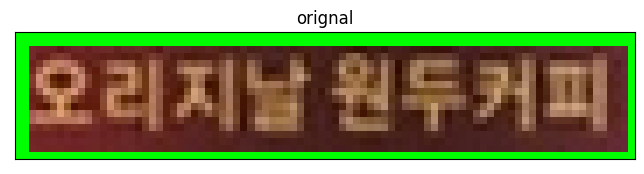

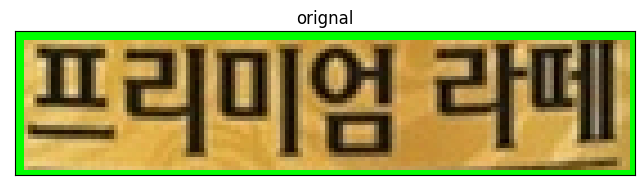

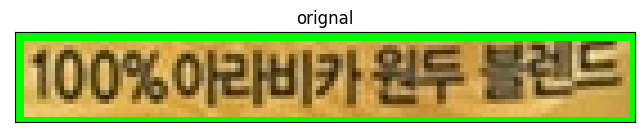

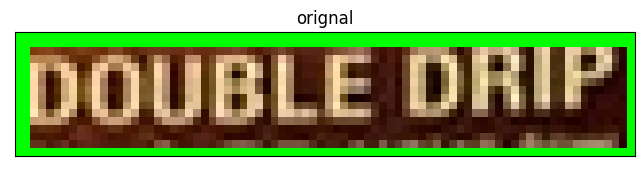

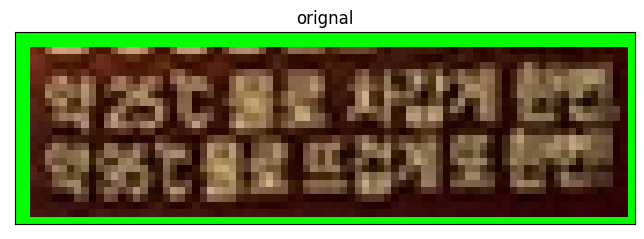

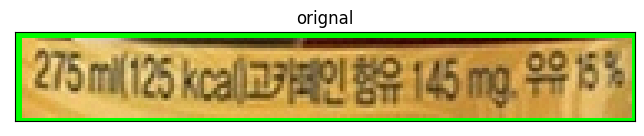

In [13]:
import cv2

# 이미지 로드
image_path = 'C:\\Users\\IT\\Desktop\\test\\kantata.jpg'
image = cv2.imread(image_path)
list_a=[]
i=0
for i in range(len(results)):
    image_path = 'C:\\Users\\IT\\Desktop\\test\\kantata.jpg'
    image = cv2.imread(image_path)
    coordinates = results[i][0]
    points = np.array(coordinates, np.int32)
    cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)
    cropped_image = image[coordinates[0][1]:coordinates[2][1], coordinates[0][0]:coordinates[1][0]]
    list_a.append(cropped_image)
    i+=1
    output_path = f'C:\\Users\\IT\\Desktop\\save\\save_img{i}.png'
    cv2.imwrite(output_path, cropped_image)
for i in range(len(list_a)):
    plt_imshow("orignal",list_a[i])
# # 좌표 설정
# coordinates = [[48, 140], [128, 140], [128, 164], [48, 164]]
# points = np.array(coordinates, np.int32)

# # 좌표로 사각형 그리기
# cv2.polylines(image, [points], isClosed=True, color=(0, 255, 0), thickness=2)

# # 좌표로 이미지 자르기
# cropped_image = image[coordinates[0][1]:coordinates[2][1], coordinates[0][0]:coordinates[1][0]]

# # 잘린 이미지 저장
# output_path = 'C:\\Users\\ICE\\Desktop\\df\\save_img.png'
# cv2.imwrite(output_path, cropped_image)

# # 이미지 창 열기 (확인용)
# plt_imshow("orignal",cropped_image)